In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [40]:
df = pd.concat([pd.read_csv('data/train_to_download_final_1.csv'),
                pd.read_csv('data/test_to_download_final_1.csv')], sort=False)
df = df.sort_values(by=['galactic year'])
df.head()

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590
116,990025,M32 (NGC 221),0.924140,76.614994,21096.189620,0.841810,11.921475,7.338607,0.721161,0.532021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059429
117,990025,Boötes III,0.935596,84.157406,33632.589101,0.838614,16.785665,10.421361,0.675058,0.610426,...,NaN,NaN,NaN,NaN,NaN,61.903641,6.543601,NaN,NaN,0.061770
118,990025,Pegasus Dwarf Sph (And VI),0.935768,84.017481,19235.305852,0.882780,18.813638,12.288576,0.980459,0.814818,...,NaN,NaN,NaN,NaN,NaN,40.117248,NaN,29.664295,NaN,0.125050
119,990025,Sextans Dwarf Sph,0.705379,65.296979,18137.306310,0.644671,11.283373,6.102029,0.625894,0.547074,...,NaN,NaN,NaN,NaN,NaN,12.965853,5.776934,39.196296,NaN,0.051552


# Предобработка
По мере реализации проекта перенесем предобработку в отдельные файлы

### Названия столбцов
Названия у столбцов конечно интересные, однако, в реальности они очень мешают. Так-что будем, по мере понимая содержания сталюцов, заменять их на более адекватные и короткие.

In [41]:
df = df.rename(columns={"galactic year": "year", "galaxy": "country"})
df.head(2)

,year,country,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.23431,0.646039,8.240543,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590
116,990025,M32 (NGC 221),0.924140,76.614994,21096.18962,0.841810,11.921475,7.338607,0.721161,0.532021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059429


### Формат даты

In [42]:
df['year'].unique()

array([ 990025,  991020,  992016,  993012,  994009,  995006,  996004,
        997002,  998001,  999000, 1000000, 1001000, 1002001, 1003002,
       1004004, 1005006, 1006009, 1007012, 1008016, 1009020, 1010025,
       1011030, 1012036, 1013042, 1014049, 1015056, 1016064], dtype=int64)

Если присмотреться к датам и немного подумать, то приходишь к выводу о том, что первые 3 цифры + 1000 = год н.э. Например 990025 => 1000 + 990 => 1990. А так-как мы имеем дело с макроэкономическими показателями, то последние 2 цифры можно отбросить.

In [43]:
df['year'] = df['year']//1000+1000
df.head()

,year,country,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,1990,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590
116,1990,M32 (NGC 221),0.924140,76.614994,21096.189620,0.841810,11.921475,7.338607,0.721161,0.532021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059429
117,1990,Boötes III,0.935596,84.157406,33632.589101,0.838614,16.785665,10.421361,0.675058,0.610426,...,NaN,NaN,NaN,NaN,NaN,61.903641,6.543601,NaN,NaN,0.061770
118,1990,Pegasus Dwarf Sph (And VI),0.935768,84.017481,19235.305852,0.882780,18.813638,12.288576,0.980459,0.814818,...,NaN,NaN,NaN,NaN,NaN,40.117248,NaN,29.664295,NaN,0.125050
119,1990,Sextans Dwarf Sph,0.705379,65.296979,18137.306310,0.644671,11.283373,6.102029,0.625894,0.547074,...,NaN,NaN,NaN,NaN,NaN,12.965853,5.776934,39.196296,NaN,0.051552


### Матрица корреляции

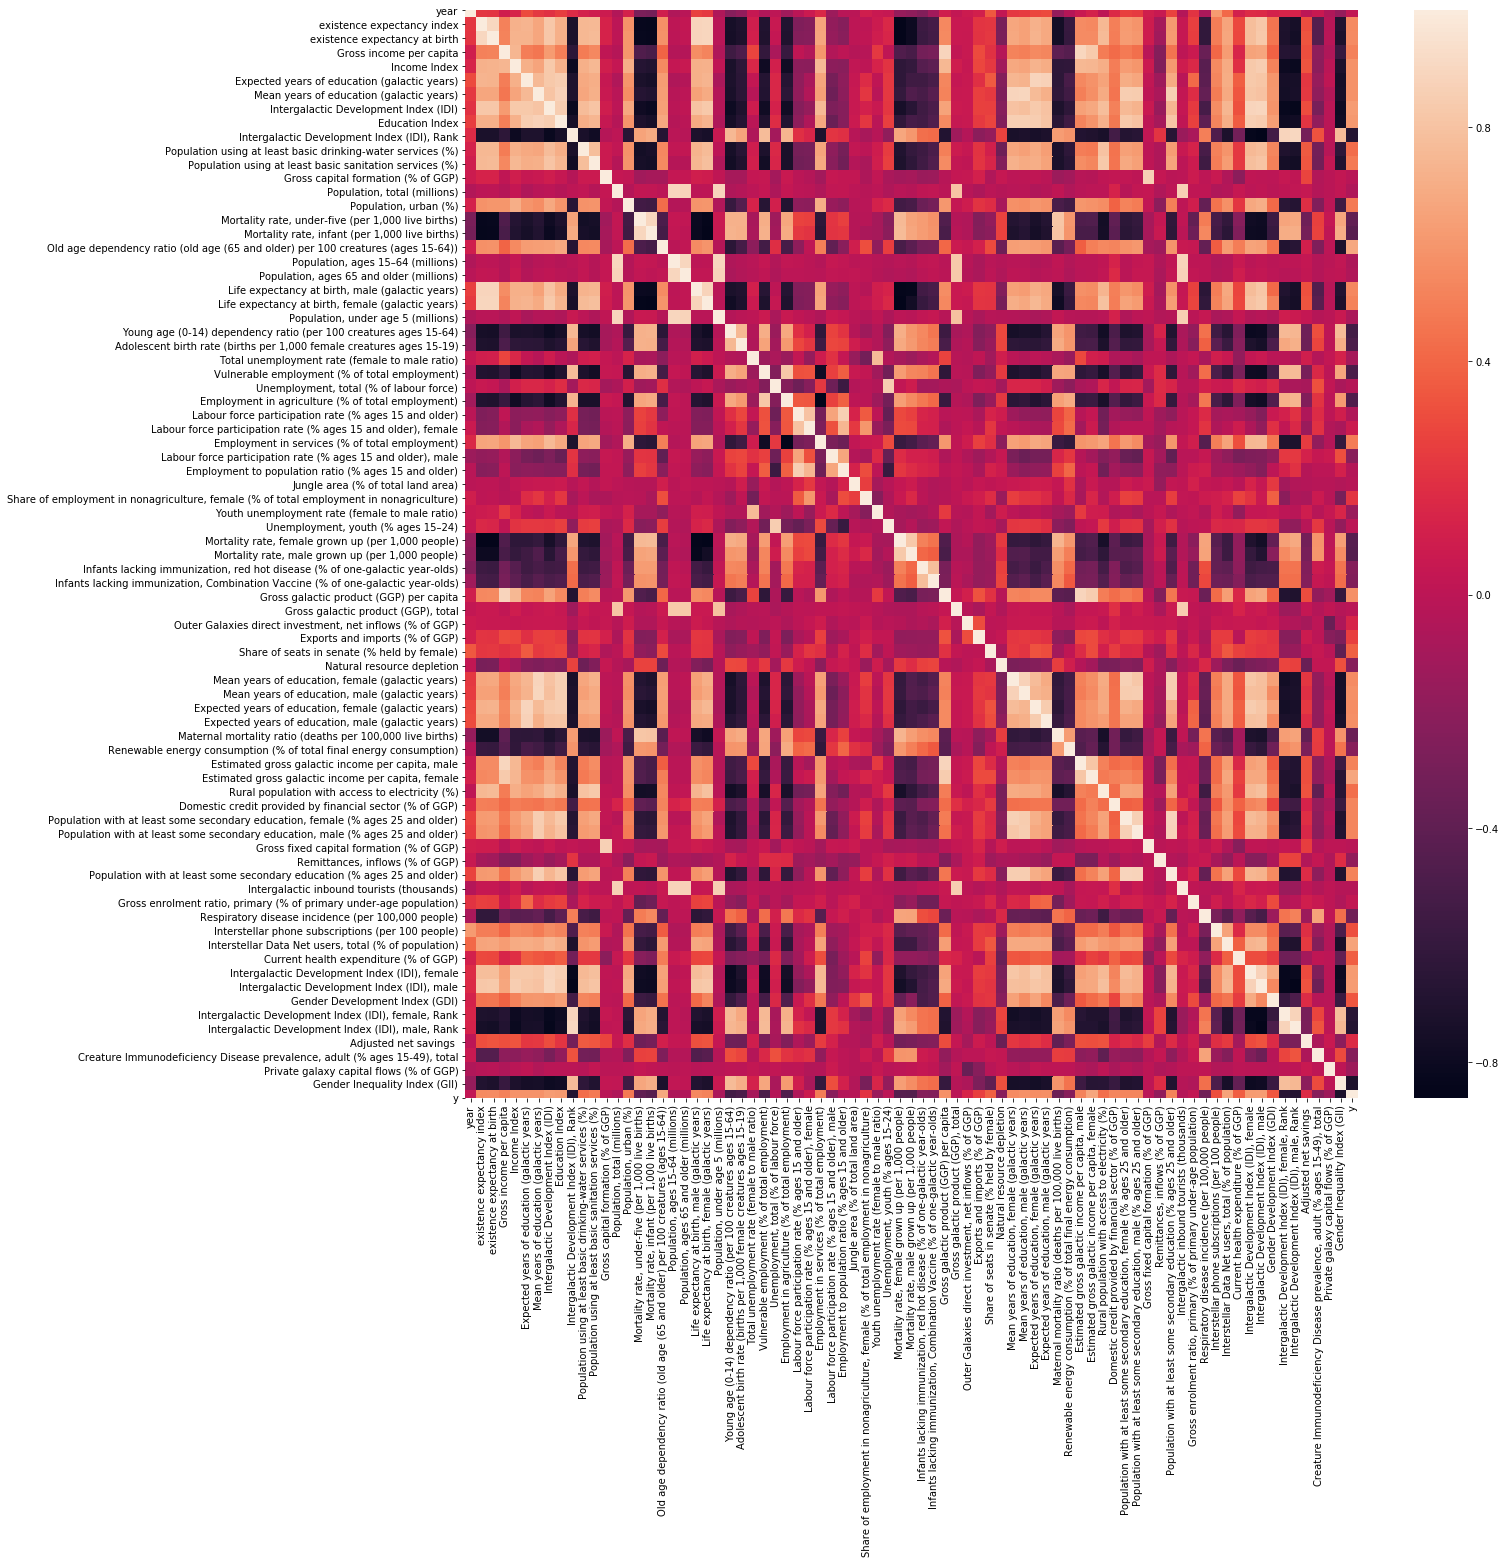

In [6]:
plt.figure(figsize = (20, 20))

corrMatrix = df.corr()
sn.heatmap(corrMatrix)

plt.show()

### Население

In [7]:
SierraLeone = pd.read_csv('data/SierraLeone/API_SLE_DS2_en_csv_v2_1001213.csv')
SierraLeone = SierraLeone.drop(columns=SierraLeone.columns[3:-31])
SierraLeone = SierraLeone.drop(columns=SierraLeone.columns[-5:])
SierraLeone.index=SierraLeone['Indicator Name']
SierraLeone = SierraLeone.drop(columns=SierraLeone.columns[:3])
SierraLeone = SierraLeone.T
SierraLeone = SierraLeone.dropna(axis=1, how='all')
SierraLeone#.head()

Indicator Name,"Presence of peace keepers (number of troops, police, and military observers in mandate)","Intentional homicides (per 100,000 people)","Internally displaced persons, new displacement associated with disasters (number of cases)",Battle-related deaths (number of people),Travel services (% of commercial service exports),Transport services (% of commercial service exports),High-technology exports (% of manufactured exports),High-technology exports (current US$),Commercial service exports (current US$),"Computer, communications and other services (% of commercial service exports)",...,Rural land area where elevation is below 5 meters (% of total land area),Rural land area where elevation is below 5 meters (sq. km),Permanent cropland (% of land area),Land under cereal production (hectares),Arable land (% of land area),Arable land (hectares per person),Arable land (hectares),Agricultural land (% of land area),Agricultural land (sq. km),"Agricultural machinery, tractors"
1990,NaN,NaN,NaN,NaN,76.187278,9.689475,NaN,NaN,4.522871e+07,1.412325e+01,...,2.833347,2045.827148,1.870324,468600.0,6.733167,0.112506,4.860000e+05,39.138265,28250.000000,200.0
1991,NaN,NaN,NaN,552.0,79.416710,19.386952,NaN,NaN,5.074554e+07,1.056888e+00,...,NaN,NaN,1.870324,453670.0,6.733167,0.111759,4.860000e+05,39.138265,28250.000000,150.0
1992,NaN,NaN,NaN,218.0,85.744997,13.031582,NaN,NaN,3.585763e+07,1.092200e+00,...,NaN,NaN,1.731782,432919.0,6.733167,0.111783,4.860000e+05,38.999723,28150.000000,135.0
1993,NaN,NaN,NaN,410.0,71.598176,26.478257,NaN,NaN,4.494548e+07,1.838877e+00,...,NaN,NaN,1.731782,456667.0,6.733167,0.112267,4.860000e+05,38.944306,28110.000000,120.0
1994,NaN,NaN,NaN,628.0,80.433546,14.391706,NaN,NaN,8.595856e+07,4.964975e+00,...,NaN,NaN,1.731782,401700.0,6.719313,0.112535,4.850000e+05,38.930452,28100.000000,110.0
1995,NaN,NaN,NaN,1472.0,80.462808,13.715552,NaN,NaN,7.103453e+07,5.553402e+00,...,NaN,NaN,1.731782,341100.0,6.719313,0.112687,4.850000e+05,38.930452,28100.000000,100.0
1996,NaN,NaN,NaN,570.0,62.958346,28.821998,NaN,NaN,4.644096e+07,8.045426e+00,...,NaN,NaN,1.731782,354500.0,6.719313,0.112459,4.850000e+05,38.930452,28100.000000,90.0
1997,NaN,NaN,NaN,748.0,50.891058,19.916318,NaN,NaN,1.972424e+07,2.900666e+01,...,NaN,NaN,1.731782,387200.0,6.705459,0.111642,4.840000e+05,38.916597,28090.000000,81.0
1998,NaN,NaN,NaN,3287.0,45.479411,26.870984,NaN,NaN,1.311740e+07,2.738730e+01,...,NaN,NaN,1.731782,335570.0,6.705459,0.110465,4.840000e+05,38.916597,28090.000000,NaN
1999,NaN,NaN,NaN,3153.0,34.627468,24.078644,NaN,NaN,1.792389e+07,4.117329e+01,...,NaN,NaN,1.662510,250092.0,6.705459,0.108462,4.840000e+05,38.847326,28040.000000,NaN


In [44]:
data = pd.read_csv('data/data.csv')
data = data.drop(columns=['Series Code', 'Country Code'])

data = data.rename(columns={'1990 [YR1990]': 1990, 
                        '1995 [YR1995]': 1995,
                        '2000 [YR2000]': 2000,
                        '2005 [YR2005]': 2005,
                        '2010 [YR2010]': 2010,
                        '2015 [YR2015]': 2015})
for column in data.columns[2:]:
    data[column] = data[column].astype(float)

data.head()

,Country Name,Series Name,1990,1995,2000,2005,2010,2015
0,South Africa,"Population, total",3.680051e+07,4.143576e+07,4.496771e+07,4.788060e+07,5.121696e+07,5.538637e+07
1,South Africa,Population growth (annual %),2.393768e+00,2.126180e+00,1.409029e+00,1.237753e+00,1.455280e+00,1.528926e+00
2,South Africa,Surface area (sq. km),1.219090e+06,1.219090e+06,1.219090e+06,1.219090e+06,1.219090e+06,1.219090e+06
3,South Africa,Population density (people per sq. km of land ...,3.033617e+01,3.415720e+01,3.706873e+01,3.946995e+01,4.222025e+01,4.565726e+01
4,South Africa,Poverty headcount ratio at national poverty li...,NaN,NaN,NaN,6.660000e+01,5.320000e+01,NaN


In [ ]:
for k in list(renaming_dictionary.keys()):
    renaming_dictionary[k] = np.random.choice(list(data['Series Name'].unique()))

In [543]:
renaming_dictionary = {
    'existence expectancy at birth': 
    'Life expectancy at birth, total (years)', 

    'Gross income per capita': 
    'GDP per capita (current US$)', 

    'Population using at least basic drinking-water services (%)': 
    'People using at least basic drinking water services (% of population)', 

    'Population using at least basic sanitation services (%)': 
    'People using at least basic sanitation services (% of population)', 

    'Gross capital formation (% of GGP)': 
    'Gross capital formation (% of GDP)', 

    'Population, total (millions)': 
    'Population, total',

    'Population, urban (%)': 
    'Urban population (% of total population)',
    
    'Mortality rate, under-five (per 1,000 live births)':
    'Mortality rate, under-5 (per 1,000 live births)',
    
    'Mortality rate, infant (per 1,000 live births)':
    'Mortality rate, infant (per 1,000 live births)',
    
    'Population, ages 15–64 (millions)':
    'Population ages 15-64, total',
    
    'Population, ages 65 and older (millions)':
    'Population ages 65 and above, total',
    
    'Life expectancy at birth, male (galactic years)':
    'Life expectancy at birth, male (years)',
    
    'Life expectancy at birth, female (galactic years)':
    'Life expectancy at birth, female (years)',
    
    'Adolescent birth rate (births per 1,000 female creatures ages 15-19)':
    'Adolescent fertility rate (births per 1,000 women ages 15-19)',
    
    'Vulnerable employment (% of total employment)':
    'Vulnerable employment, total (% of total employment) (modeled ILO estimate)',
    
    'Employment in agriculture (% of total employment)':
    'Employment in agriculture (% of total employment) (modeled ILO estimate)',
    
    'Employment in services (% of total employment)':
    'Employment in services (% of total employment) (modeled ILO estimate)',
    
    'Employment to population ratio (% ages 15 and older)':
    'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',
    
    'Rural population with access to electricity (%)':
    'Access to electricity, rural (% of rural population)',
    
    'Maternal mortality ratio (deaths per 100,000 live births)':
    'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
    
    'Labour force participation rate (% ages 15 and older)':
    'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
    
    'Labour force participation rate (% ages 15 and older), female':
    'Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)',
    
    'Labour force participation rate (% ages 15 and older), male':
    'Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)',
    
    'Mortality rate, female grown up (per 1,000 people)':
    'Mortality rate, adult, female (per 1,000 female adults)',
    
    'Mortality rate, male grown up (per 1,000 people)':
    'Mortality rate, adult, male (per 1,000 male adults)',
    
    'Gross fixed capital formation (% of GGP)':
    'Gross fixed capital formation (% of GDP)',
    
    'Outer Galaxies direct investment, net inflows (% of GGP)':
    'Foreign direct investment, net inflows (% of GDP)',
    
    'Adjusted net savings ':#! excluding or including
    'Adjusted net savings, excluding particulate emission damage (% of GNI)',
    
    'Domestic credit provided by financial sector (% of GGP)':
    'Domestic credit provided by financial sector (% of GDP)',
    
    'Current health expenditure (% of GGP)':
    'Current health expenditure (% of GDP)',
    
    'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))':
    'Age dependency ratio, old (% of working-age population)'
}
len(renaming_dictionary.keys())

31

In [544]:
df.columns[~df.columns.isin(renaming_dictionary.keys())]

Index(['year', 'country', 'existence expectancy index', 'Income Index',
       'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank',
       'Population, under age 5 (millions)',
       'Young age (0-14) dependency ratio (per 100 creatures ages 15-64)',
       'Total unemployment rate (female to male ratio)',
       'Unemployment, total (% of labour force)',
       'Jungle area (% of total land area)',
       'Share of employment in nonagriculture, female (% of total employment in nonagriculture)',
       'Youth unemployment rate (female to male ratio)',
       'Unemployment, youth (% ages 15–24)',
       'Infants lacking immunization, red hot disease (% of one-galactic year-olds)',
       'Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)',
       'Gross galactic product (GGP) per capita',
   

In [545]:
series = {}

for c in list(renaming_dictionary.values()):
    for year in range(2000, 2015, 5):
        d = data[data['Series Name']==c].rank(method='max')[['Country Name', year]]
        d = d.sort_values(by=['Country Name'])
        if len(d) == 264:
            series[c+' '+str(year)] = d[year].to_numpy()
        else:
            print(c)
    
df_series = pd.DataFrame(data=series)
df_series = df_series.fillna(data.median(axis=0), axis=0)
df_series = (df_series - df_series.min()) / df_series.max()
df_series = df_series.fillna(df_series.median(axis=0), axis=0)
df_series.describe()

,"Life expectancy at birth, total (years) 2000","Life expectancy at birth, total (years) 2005","Life expectancy at birth, total (years) 2010",GDP per capita (current US$) 2000,GDP per capita (current US$) 2005,GDP per capita (current US$) 2010,People using at least basic drinking water services (% of population) 2000,People using at least basic drinking water services (% of population) 2005,People using at least basic drinking water services (% of population) 2010,People using at least basic sanitation services (% of population) 2000,...,"Adjusted net savings, excluding particulate emission damage (% of GNI) 2010",Domestic credit provided by financial sector (% of GDP) 2000,Domestic credit provided by financial sector (% of GDP) 2005,Domestic credit provided by financial sector (% of GDP) 2010,Current health expenditure (% of GDP) 2000,Current health expenditure (% of GDP) 2005,Current health expenditure (% of GDP) 2010,"Age dependency ratio, old (% of working-age population) 2000","Age dependency ratio, old (% of working-age population) 2005","Age dependency ratio, old (% of working-age population) 2010"
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.498022,0.497983,0.498014,0.497990,0.498046,0.498046,0.499399,0.499234,0.499636,0.498553,...,0.497338,0.497532,0.497828,0.497845,0.498156,0.498155,0.497903,0.497948,0.497948,0.497948
std,0.279728,0.279164,0.279176,0.278587,0.282541,0.282541,0.281336,0.287115,0.289380,0.280099,...,0.242119,0.250506,0.267030,0.267046,0.268757,0.271094,0.271677,0.275735,0.275736,0.275739
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.266194,0.267276,0.267276,0.268367,0.260913,0.260913,0.267276,0.255837,0.252885,0.267276,...,0.355405,0.332071,0.292222,0.292222,0.288377,0.283405,0.282189,0.273958,0.273958,0.273958
50%,0.497976,0.497967,0.497967,0.497959,0.498016,0.498016,0.497967,0.498054,0.498077,0.497967,...,0.497297,0.497475,0.497778,0.497778,0.500000,0.500000,0.497854,0.497917,0.497917,0.497917
75%,0.729757,0.728659,0.728659,0.727551,0.735119,0.735119,0.728659,0.740272,0.743269,0.728659,...,0.639189,0.662879,0.703333,0.703333,0.707237,0.712284,0.713519,0.721875,0.721875,0.721875
max,0.995951,0.995935,0.995935,0.995918,0.996032,0.996032,0.995935,0.996109,0.996154,0.995935,...,0.994595,0.994949,0.995556,0.995556,0.995614,0.995690,0.995708,0.995833,0.995833,0.995833


In [546]:
original_series = {}

for c in list(renaming_dictionary.keys()):
    for year in range(2000, 2015, 5):
        d = df[df.year==year]
        d = d.sort_values(by=['country'])
        d = d[['country', c]].rank(method='max')

        if len(d) == 180:
            original_series[renaming_dictionary[c]+' '+str(year)] = d[c].to_numpy()
        else:
            print(c)
df_original_series = pd.DataFrame(data=original_series)
df_original_series = (df_original_series - df_original_series.min()) / df_original_series.max()
df_original_series = df_original_series.fillna(df_original_series.median(axis=0), axis=0)
df_original_series.describe()

,"Life expectancy at birth, total (years) 2000","Life expectancy at birth, total (years) 2005","Life expectancy at birth, total (years) 2010",GDP per capita (current US$) 2000,GDP per capita (current US$) 2005,GDP per capita (current US$) 2010,People using at least basic drinking water services (% of population) 2000,People using at least basic drinking water services (% of population) 2005,People using at least basic drinking water services (% of population) 2010,People using at least basic sanitation services (% of population) 2000,...,"Adjusted net savings, excluding particulate emission damage (% of GNI) 2010",Domestic credit provided by financial sector (% of GDP) 2000,Domestic credit provided by financial sector (% of GDP) 2005,Domestic credit provided by financial sector (% of GDP) 2010,Current health expenditure (% of GDP) 2000,Current health expenditure (% of GDP) 2005,Current health expenditure (% of GDP) 2010,"Age dependency ratio, old (% of working-age population) 2000","Age dependency ratio, old (% of working-age population) 2005","Age dependency ratio, old (% of working-age population) 2010"
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.497222,0.497222,0.497222,0.497207,0.497207,0.497222,0.497093,0.497175,0.497191,0.497093,...,0.496552,0.496622,0.497041,0.497024,0.497110,0.497159,0.497175,0.497207,0.497207,0.497207
std,0.289476,0.289476,0.289476,0.288671,0.288671,0.289476,0.282970,0.287053,0.287863,0.282970,...,0.259810,0.262485,0.280491,0.279660,0.283791,0.286241,0.287053,0.288671,0.288671,0.288671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.248611,0.248611,0.248611,0.250000,0.250000,0.248611,0.260174,0.252825,0.251404,0.260174,...,0.308621,0.302365,0.264793,0.266369,0.258671,0.254261,0.252825,0.250000,0.250000,0.250000
50%,0.497222,0.497222,0.497222,0.497207,0.497207,0.497222,0.497093,0.497175,0.497191,0.497093,...,0.496552,0.496622,0.497041,0.497024,0.497110,0.497159,0.497175,0.497207,0.497207,0.497207
75%,0.745833,0.745833,0.745833,0.744413,0.744413,0.745833,0.734012,0.741525,0.742978,0.734012,...,0.684483,0.690878,0.729290,0.727679,0.735549,0.740057,0.741525,0.744413,0.744413,0.744413
max,0.994444,0.994444,0.994444,0.994413,0.994413,0.994444,0.994186,0.994350,0.994382,0.994186,...,0.993103,0.993243,0.994083,0.994048,0.994220,0.994318,0.994350,0.994413,0.994413,0.994413


In [547]:
N = 500
original_series = df_original_series.to_numpy()[:,:N]
series = df_series.to_numpy()[:,:N]

errors = []
indexs = []
for i in range(len(original_series)):
    error = np.abs(series - original_series[i])**0.5
    error = np.sum(error, axis=1)
    errors.append(np.min(error))
    indexs.append(np.argmin(error))
print(len(np.unique(indexs)), sum(errors))

180 4884.101840987617


# Черновик

In [71]:
for c in df.columns:
    if c not in df_test.columns:
        print(c)

y


In [72]:
df.columns

Index(['year', 'country', 'existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank',
       'Population using at least basic drinking-water services (%)',
       'Population using at least basic sanitation services (%)',
       'Gross capital formation (% of GGP)', 'Population, total (millions)',
       'Population, urban (%)',
       'Mortality rate, under-five (per 1,000 live births)',
       'Mortality rate, infant (per 1,000 live births)',
       'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
       'Population, ages 15–64 (millions)',
       'Population, ages 65 and older (millions)',
       'Life expectancy at birth, male (galactic years)',
       'Life expectancy at 

In [63]:
df_test = pd.read_csv('data/test_to_download_final_1.csv')
df_test = df_test.rename(columns={"galactic year": "year", "galaxy": "country"})
df_test['year'] = df_test['year']//1000+1000
df_test.head()

,year,country,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
0,2007,KK98 77,0.456086,51.562543,12236.576447,0.593325,10.414164,10.699072,0.547114,0.556267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,Reticulum III,0.529835,57.228262,3431.883825,0.675407,7.239485,5.311122,0.497688,0.409969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,Reticulum III,0.560976,59.379539,27562.914252,0.594624,11.774890,5.937797,0.544744,0.486167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007,Segue 1,0.565910,59.952390,20352.232905,0.837700,11.613621,10.067882,0.691641,0.523441,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,Virgo I,0.588274,55.428320,23959.704016,0.520579,10.392416,6.374637,0.530676,0.580418,...,7.357729,0.583373,0.600445,0.856158,206.674424,224.104054,NaN,7.687626,NaN,NaN


In [67]:
df[df['country']=='Large Magellanic Cloud (LMC)']

,year,country,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,1990,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590
194,1991,Large Magellanic Cloud (LMC),0.627245,62.389059,17114.109182,0.503198,9.317262,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052115
410,1992,Large Magellanic Cloud (LMC),0.662135,68.794245,13225.033915,0.692653,8.030645,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052006
543,1993,Large Magellanic Cloud (LMC),0.687776,62.848660,9116.133706,0.667264,11.347429,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051675
765,1994,Large Magellanic Cloud (LMC),0.727717,67.482431,3598.172394,0.609830,10.402265,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051334
1053,1995,Large Magellanic Cloud (LMC),0.801878,64.024931,30050.765207,0.560245,8.811260,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051056
1244,1996,Large Magellanic Cloud (LMC),0.727336,61.110448,16921.403977,0.731106,9.915121,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050473
1411,1997,Large Magellanic Cloud (LMC),0.751123,71.737634,14009.050465,0.695900,9.231937,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050179
1570,1998,Large Magellanic Cloud (LMC),0.817002,67.396675,12586.331228,0.675266,8.640981,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049803
1758,1999,Large Magellanic Cloud (LMC),0.765157,68.828983,18638.673092,0.605786,9.540513,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049484


In [68]:
df_test[df_test['country']=='Large Magellanic Cloud (LMC)']

,year,country,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
144,2008,Large Magellanic Cloud (LMC),0.779758,75.346249,19231.348529,0.707828,13.327868,6.806029,0.672352,0.586943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,2015,Large Magellanic Cloud (LMC),0.790034,79.425296,21972.122930,0.831417,17.095940,6.481246,0.686543,0.597843,...,7.608230,0.726385,0.776223,0.967956,164.709313,143.100943,37.541783,NaN,NaN,0.637706
238,2009,Large Magellanic Cloud (LMC),0.844595,73.130032,24127.802732,0.833485,14.733714,6.837942,0.748864,0.643202,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,2012,Large Magellanic Cloud (LMC),0.853172,77.321986,27416.106737,0.880479,18.084904,6.901763,0.826286,0.654600,...,5.974166,0.593091,0.699998,1.025146,179.431965,169.977006,51.177074,NaN,NaN,0.764961
309,2007,Large Magellanic Cloud (LMC),0.884930,76.399821,21735.014557,0.877009,13.377857,8.086796,0.738597,0.473309,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
322,2016,Large Magellanic Cloud (LMC),0.890742,84.311153,25033.664800,0.702787,16.539201,4.821879,0.820799,0.597755,...,5.230947,0.732648,0.721877,1.008883,167.884519,158.925840,39.846644,NaN,NaN,0.505578
375,2010,Large Magellanic Cloud (LMC),0.918996,78.142755,28751.348361,0.853777,14.649964,5.930653,0.721419,0.494747,...,4.511014,0.736388,0.713423,0.992057,162.494448,161.464294,43.391708,NaN,NaN,NaN
422,2011,Large Magellanic Cloud (LMC),0.937656,83.695703,21567.525973,0.876733,14.426615,4.763673,0.809155,0.577366,...,5.952772,0.639062,0.703167,0.921881,163.119476,159.863256,43.022405,NaN,NaN,NaN


In [51]:
df[df['country']=='Large Magellanic Cloud (LMC)']

,year,country,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,1990,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590
194,1991,Large Magellanic Cloud (LMC),0.627245,62.389059,17114.109182,0.503198,9.317262,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052115
410,1992,Large Magellanic Cloud (LMC),0.662135,68.794245,13225.033915,0.692653,8.030645,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052006
543,1993,Large Magellanic Cloud (LMC),0.687776,62.848660,9116.133706,0.667264,11.347429,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051675
765,1994,Large Magellanic Cloud (LMC),0.727717,67.482431,3598.172394,0.609830,10.402265,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051334
1053,1995,Large Magellanic Cloud (LMC),0.801878,64.024931,30050.765207,0.560245,8.811260,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051056
1244,1996,Large Magellanic Cloud (LMC),0.727336,61.110448,16921.403977,0.731106,9.915121,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050473
1411,1997,Large Magellanic Cloud (LMC),0.751123,71.737634,14009.050465,0.695900,9.231937,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050179
1570,1998,Large Magellanic Cloud (LMC),0.817002,67.396675,12586.331228,0.675266,8.640981,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049803
1758,1999,Large Magellanic Cloud (LMC),0.765157,68.828983,18638.673092,0.605786,9.540513,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049484
